# Introduction

WHAT?

The original idea of this project is to predict salary of IT developer based on his/her technical skills (programming language, databases, frameworks, operating system etc) and personal information (gender, age, country of employment, education, years of experience etc).

WHY?

# Random Forest Overview

# Gettig Started
In this prediction, I will be using the sklearn’s implementation of Random Forest. 

In [1]:
# Libraries
import pandas as pd
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data

The Data has been collected from [Kaggle](https://www.kaggle.com) community.
The dataset "Stack Overflow 2018 Developer Survey" refers to users(developers) of a Stack Overflow community. The raw data contains a sample of 98855 responders and 129 attributes in .csv format. The data represents an information such as users background, education, technical skills, salary etc. over the past year(2018). The dataset's structure corresponds to multiple choice survey, where one respondent per row and one column per answer. 

Below is some more information an each feature which I gropped by a meaning:


In [2]:
# Data overview
df_original = pd.read_csv("data/survey_results_public.csv", index_col=0)
df_original.head(5)

/Users/nadezhda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


## Analysis

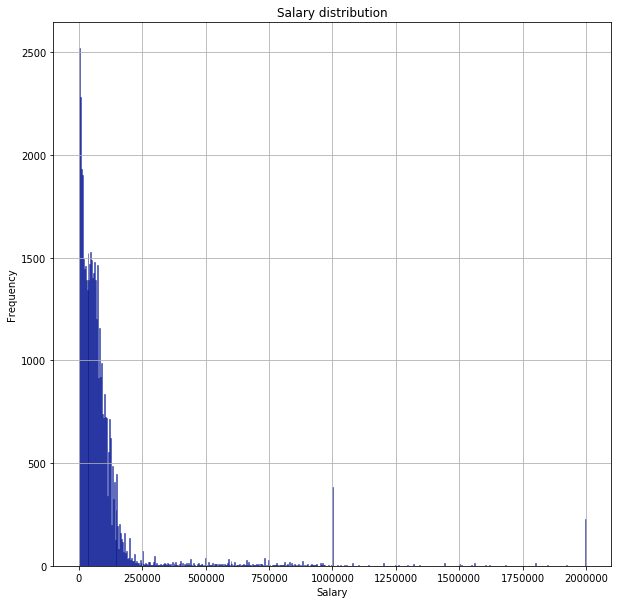

In [3]:
# Discriptive statistics:

# 1.1 Salary distribution
fig = plt.figure(figsize=(10,10))
ax =fig.gca()
plt.hist(df_original.ConvertedSalary.dropna(), alpha = 0.5,bins='auto',ec='darkblue')
ax.grid()
plt.title("Salary distribution")
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency');

We have some outliers which can affect further descriptive statistics and modelling part.

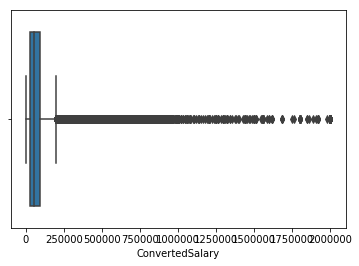

In [4]:
# Detect the Outliers with Box plot
import seaborn as sns
sns.boxplot(x=df_original['ConvertedSalary']);

In [5]:
# Detect the Outliers with IQR score
Q1 = df_original.ConvertedSalary.quantile(0.25)
Q3 = df_original.ConvertedSalary.quantile(0.75)
IQR = Q3 - Q1
print('Q1: ',Q1, 'Q3: ', Q3, 'IQR: ', IQR)

Q1:  23844.0 Q3:  93000.0 IQR:  69156.0


In [6]:
# Detect the Outliers with IQR score
Q1 = df_original.ConvertedSalary.quantile(0.25)
Q3 = df_original.ConvertedSalary.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
print(df_original.ConvertedSalary < (Q1 - 1.5 * IQR)) | (df_original.ConvertedSalary > (Q3 + 1.5 * IQR))

Respondent
1         False
3         False
4         False
5         False
7         False
8         False
9         False
10        False
11        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
26        False
27        False
29        False
31        False
33        False
34        False
37        False
38        False
39        False
41        False
43        False
44        False
45        False
46        False
          ...  
101084    False
101085    False
101114    False
101120    False
101138    False
101151    False
101152    False
101154    False
101170    False
101185    False
101200    False
101202    False
101205    False
101258    False
101263    False
101281    False
101310    False
101358    False
101366    False
101371    False
101391    False
101396    False
101411    False
101432    False
101478    False
101513    False
101531    False
101541    False
101544    False
101548    False
Name: Convert

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [7]:
# Removing Outliers
df_original_out = df_original.copy()
df_original_out.ConvertedSalary = df_original_out.ConvertedSalary[~((df_original.ConvertedSalary < (Q1 - 1.5 * IQR)) |(df_original_out.ConvertedSalary > (Q3 + 1.5 * IQR)))]

In [ ]:
# 1.2 Salary distribution in the interval (without outliers)
plt.hist(df_original_out.ConvertedSalary.dropna(), alpha = 0.5,bins='auto',ec='black')
plt.title("Salary distribution in the interval (without outliers)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# 2.1 Mean salary by educational groups
df_original_out.groupby('FormalEducation')['ConvertedSalary'].mean()

In [ ]:
# 2.2 Mean salary by age groups
df_original_out.groupby('Age')['ConvertedSalary'].mean()

In [ ]:
# 2.3 Mean salary by years of coding professionally groups
df_original_out.groupby('YearsCodingProf')['ConvertedSalary'].mean()

In [9]:
# 2. Mean salary by language
# For this step we need preprocess column 'LanguageWorkedWith'. This column contain multiple choice. 
# For flexible manipulation let use one hot encoding. The df_final2 is preprocessing data which consist of encoding
# columns (with multiple choice) from df_original. 
df = pd.read_csv("data/final_df2.csv", index_col=0)

/Users/nadezhda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


mean salary for Education, language, age, years of codig

## Preprocessing

In [10]:
# Add col 'ConvertedSalary' from df_original_out to df_final2
df['ConvertedSalary']=df_original_out['ConvertedSalary'].copy()

df.ConvertedSalary.describe()

# Remove NaN values from df.ConvertedSalary
df = df[(df['ConvertedSalary'].notnull())]
# We have 43858 from 98855 values
len(df)

43858

In [11]:
# Binning df.ConvertedSalary
# The original data values will fall to in a given interval

#Define bins as -1-20 (0 included), 20-40, 40-60, 60-80, 80-100, 100-200
bins = [-1, 20000, 40000, 60000, 80000, 100000, 200000]

#Define bins as -1-15 (0 included), 15-30, 30-45, 45-60, 60-75, 75-80, 80-95, 95-200
#bins2 = [-1, 15000, 30000, 45000, 60000, 75000, 80000, 95000, 200000]

#names for the groups
group_names = ['poor','very_low','low','average','high','very_high']

#group_names2 = ['poor','very_low','low','low_average', 'average','high_average','high','very_high']

df['SalaryInterval_bin'] = pd.cut(df.ConvertedSalary, bins, labels = group_names)

In [12]:
df[['ConvertedSalary','SalaryInterval_bin']]

,ConvertedSalary,SalaryInterval_bin
3,70841.0,average
7,21426.0,very_low
8,41671.0,low
9,120000.0,very_high
21,0.0,poor
27,47904.0,low
28,0.0,poor
33,95968.0,high
37,420.0,poor
38,75000.0,average


In [ ]:
list(df.columns)

In [13]:
# Imputing missing values for technologies 

PERSONA_COLS = ['Hobby',
                'OpenSource',
                'Country',
                'StackOverflowHasAccount',
                'Gender',
                'Dependents',
                '25 - 34 years old',
                '35 - 44 years old',
                '18 - 24 years old',
                '45 - 54 years old',
                '55 - 64 years old',
                'Under 18 years old',
                '65 years or older',
                'Employed part-time',
                'Employed full-time',
                'Independent contractor, freelancer, or self-employed',
                'Not employed, and not looking for work',
                'Not employed, but looking for work',
                'Retired',
                '3-5 years',
                '18-20 years',
                '6-8 years',
                '12-14 years',
                '0-2 years',
                '21-23 years',
                '24-26 years',
                '9-11 years',
                '15-17 years',
                '27-29 years',
                '30 or more years',]

LANG_COLS = ['C',
 'C#',
 'C++',
 'Objective-C',
 'Java',
 'JavaScript',
 'PHP',
 'CSS',
 'HTML',
 'TypeScript',
 'SQL',
 'Python',
 'Bash/Shell',
 'Lua',
 'Ruby',
 'Scala',
 'R',
 'Assembly',
 'Rust',
 'Kotlin',
 'Go',
 'VB.NET',
 'VBA',
 'Matlab',
 'Perl',
 'Cobol',
 'Delphi/Object Pascal',
 'Erlang',
 'Haskell',
 'Clojure',
 'Visual Basic 6',
 'CoffeeScript',
 'Swift',
 'Groovy',
 'Ocaml',
 'Julia',
 'Hack',
 'F#']

TECH_COLS = ['Amazon RDS/Aurora',
 'Google BigQuery',
 'Cassandra',
 'Amazon DynamoDB',
 'Elasticsearch',
 'Google Cloud Storage',
 'Apache HBase',
 'Apache Hive',
 'IBM Db2',
 'MariaDB',
 'Memcached',
 'Microsoft Azure (Tables, CosmosDB, SQL, etc)',
 'MongoDB',
 'MySQL',
 'Neo4j',
 'Oracle',
 'PostgreSQL',
 'Redis',
 'Amazon Redshift',
 'SQL Server',
 'SQLite',
 'AWS',
 'Amazon Echo',
 'Android',
 'Arduino',
 'Azure',
 'Google Cloud Platform/App Engine',
 'Google Home',
 'Linux',
 'Mac OS',
 'iOS',
 'Apple Watch or Apple TV',
 'Serverless',
 'Raspberry Pi',
 'Windows Desktop or Server',
 'Windows Phone',
 'Firebase',
 'WordPress',
 'Heroku',
 'IBM Cloud or Watson',
 'Mainframe',
 'ESP8266',
 'SharePoint',
 'Gaming console',
 'Predix',
 'Drupal',
 'Salesforce',
 'Angular',
 'Django',
 'Node.js',
 'React',
 'Spark',
 'Spring',
 '.NET Core',
 'Cordova',
 'TensorFlow',
 'Torch/PyTorch',
 'Hadoop',
 'Xamarin',
 'Atom',
 'Visual Studio',
 'Visual Studio Code',
 'Sublime Text',
 'Notepad++',
 'IntelliJ',
 'PyCharm',
 'Vim',
 'Eclipse',
 'NetBeans',
 'Android Studio',
 'Xcode',
 'Coda',
 'PHPStorm',
 'IPython / Jupyter',
 'Emacs',
 'RStudio',
 'RubyMine',
 'Zend',
 'Light Table',
 'Komodo',
 'TextMate',
 'Linux-based',
 'Windows',
 'MacOS',
 'BSD/Unix']

SW_METHODOLOGIES = ['Agile',
                    'Evidence-based software engineering',
                    'Extreme programming (XP)',
                    'Formal standard such as ISO 9001 or IEEE 12207 (aka “waterfall” methodologies)',
                    'Kanban',
                    'Lean',
                    'Mob programming',
                    'PRINCE2',
                    'Pair programming',
                    'Scrum']

ROLES = ['Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'Desktop or enterprise applications developer',
 'DevOps specialist',
 'Educator or academic researcher',
 'Embedded applications or devices developer',
 'Engineering manager',
 'Front-end developer',
 'Full-stack developer',
 'Game or graphics developer',
 'Marketing or sales professional',
 'Mobile developer',
 'Product manager',
 'QA or test developer',
 'Student.1',
 'System administrator'] 

ACADEMIC_CRED =['Bachelor',
                'Associate_degree',
                'College',
                'Master',
                'Secondary_school',
                'Primary/elementary_school',
                'Professional_degree',
                'Non-education',
                'PhD',
                'MS',
                'NS',
                'CS',
                'FA',
                'IT',
                'ES',
                'BS',
                'SS',
                'WD',
                'HD',
                'HS',
                'no',
                'stud_No',
                'stud_Yes, part-time',
                'stud_Yes, full-time']

COMP_SIZE = ['20 to 99 employees',
             '10,000 or more employees',
             '100 to 499 employees',
             '10 to 19 employees',
             '500 to 999 employees',
             '1,000 to 4,999 employees',
             '5,000 to 9,999 employees',
             'Fewer than 10 employees']

In [ ]:
# labeling nan for features cols as -1

for col in PERSONA_COLS:
    df[col] = df[col].fillna(-1)

for col in LANG_COLS:
    df[col] = df[col].fillna(-1)

for col in TECH_COLS:
    df[col] = df[col].fillna(-1)
    
for col in SW_METHODOLOGIES:
     df[col] = df[col].fillna(-1)
        
for col in ROLES:
     df[col] = df[col].fillna(-1)

for col in ACADEMIC_CRED:
     df[col] = df[col].fillna(-1)
        
for col in COMP_SIZE:
     df[col] = df[col].fillna(-1)

In [ ]:
df.head(10)

In [ ]:
Counter( [ item for i, item in enumerate(df.SalaryInterval_bin.values) if pd.notna(df.SalaryInterval_bin[i])==True]  )

In [ ]:
sum(df['SalaryInterval_bin'].isnull())

In [ ]:
# filter out all the rows with nan in target column 

#df['SalaryInterval_2'] = df['SalaryInterval_2'].fillna('nan')


#df = df[df['SalaryInterval_2'] != 'nan']

In [ ]:
# encoding target values
categories = list(set(df['SalaryInterval_bin'].values))
category_indx = {cat: indx for indx, cat in enumerate(categories)}
df['SalaryInterval_bin'] = df['SalaryInterval_bin'].apply(lambda x: category_indx[x])

In [ ]:
df.SalaryInterval_bin.head(5)

In [ ]:
# labeling countries values

df.Country = df.Country.astype('category')
df.Country = df.Country.cat.codes
df.Country.head(5)

## Model

In [ ]:
from sklearn.model_selection import train_test_split
#%% split data into test and training set
from sklearn.ensemble import RandomForestClassifier


# target = df.SalaryInterval
# features = df.drop('SalaryInterval', axis = 1)


FEATURES_COLS = PERSONA_COLS + LANG_COLS + TECH_COLS + SW_METHODOLOGIES + ROLES + ACADEMIC_CRED + COMP_SIZE
TARGET_COLS = ['SalaryInterval_bin']

features = df[FEATURES_COLS]
target = df[TARGET_COLS]

In [ ]:
#%% Set the test sample to be 25% of your observations. Avoid overfitting
#X_train, X_test, y_train, y_test
features_train, features_test, target_train, target_test = train_test_split(features,target,
                                                                            test_size=0.25,random_state=0)


print("features_train: ", features_train.shape)
print("features_test: ", features_test.shape)
print("target_train: ", target_train.shape)
print("target_test: ", target_test.shape)

In [ ]:
rf = RandomForestClassifier(criterion='entropy', n_estimators = 100)
rf.fit(features_train, target_train)
predicted_test = rf.predict(features_test)

## Estimation

In [ ]:
accuracy = accuracy_score(target_test,predicted_test)
print("Acuuracy: ", accuracy)
target_names = ['poor','very_low','low','average','high','very_high']

print("classification_report", classification_report(target_test, predicted_test, target_names=target_names))

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(target_test,predicted_test)
sns.heatmap(mat.T, square=False, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## WITHOUT NA

In [14]:
df_nan_out = df.dropna(axis=0)

In [15]:
df_nan_out.head(10)

,Hobby,OpenSource,Country,StackOverflowHasAccount,Gender,Dependents,SalaryInterval,Amazon RDS/Aurora,Google BigQuery,Cassandra,...,30 or more years,25 - 34 years old,35 - 44 years old,18 - 24 years old,45 - 54 years old,55 - 64 years old,Under 18 years old,65 years or older,ConvertedSalary,SalaryInterval_bin
8,1,1,United States,1.0,1.0,1.0,220000-270000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41671.0,low
105,0,0,Germany,1.0,1.0,0.0,30000-45000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,85708.0,high
111,1,1,United States,1.0,1.0,0.0,105000-120000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36000.0,very_low
117,1,1,United States,1.0,1.0,0.0,105000-120000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,64116.0,average
124,1,0,Portugal,1.0,1.0,0.0,15000-30000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,82648.0,high
127,0,0,New Zealand,0.0,1.0,0.0,45000-60000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,78000.0,average
128,0,0,Turkey,1.0,1.0,0.0,220000-270000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14000.0,poor
131,1,1,Poland,1.0,1.0,0.0,30000-45000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,42456.0,low
145,1,1,France,1.0,1.0,0.0,45000-60000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,97910.0,high
153,1,1,United States,1.0,1.0,0.0,90000-105000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,35244.0,very_low


In [ ]:
#df_nan_out = df_nan_out[df_nan_out!= -1]

In [ ]:
df_nan_out.head(10)

In [16]:
len(df_nan_out)

8128

In [17]:
# Binning df.ConvertedSalary
# The original data values will fall to in a given interval

#Define bins as -1-20 (0 included), 20-40, 40-60, 60-80, 80-100, 100-200
bins = [-1, 20000, 40000, 60000, 80000, 100000, 200000]

#Define bins as -1-15 (0 included), 15-30, 30-45, 45-60, 60-75, 75-80, 80-95, 95-200
#bins2 = [-1, 15000, 30000, 45000, 60000, 75000, 80000, 95000, 200000]

#names for the groups
group_names = ['poor','very_low','low','average','high','very_high']

#group_names2 = ['poor','very_low','low','low_average', 'average','high_average','high','very_high']

df_nan_out['SalaryInterval_bin'] = pd.cut(df_nan_out.ConvertedSalary, bins, labels = group_names)

/Users/nadezhda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
df_nan_out[['ConvertedSalary','SalaryInterval_bin']]

,ConvertedSalary,SalaryInterval_bin
8,41671.0,low
105,85708.0,high
111,36000.0,very_low
117,64116.0,average
124,82648.0,high
127,78000.0,average
128,14000.0,poor
131,42456.0,low
145,97910.0,high
153,35244.0,very_low


In [19]:
# encoding target values
categories = list(set(df_nan_out['SalaryInterval_bin'].values))
category_indx = {cat: indx for indx, cat in enumerate(categories)}
df_nan_out['SalaryInterval_bin'] = df_nan_out['SalaryInterval_bin'].apply(lambda x: category_indx[x])

/Users/nadezhda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
# labeling countries values

df_nan_out.Country = df_nan_out.Country.astype('category')
df_nan_out.Country = df_nan_out.Country.cat.codes
df_nan_out.Country.head(5)

/Users/nadezhda/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


8      113
105     36
111    113
117    113
124     85
Name: Country, dtype: int8

In [21]:
from sklearn.model_selection import train_test_split
#%% split data into test and training set
from sklearn.ensemble import RandomForestClassifier


# target = df.SalaryInterval
# features = df.drop('SalaryInterval', axis = 1)


FEATURES_COLS = PERSONA_COLS + LANG_COLS + TECH_COLS + SW_METHODOLOGIES + ROLES + ACADEMIC_CRED + COMP_SIZE
TARGET_COLS = ['SalaryInterval_bin']

features = df_nan_out[FEATURES_COLS]
target = df_nan_out[TARGET_COLS]

In [22]:
#%% Set the test sample to be 25% of your observations. Avoid overfitting
#X_train, X_test, y_train, y_test
features_train, features_test, target_train, target_test = train_test_split(features,target,
                                                                            test_size=0.25,random_state=0)


print("features_train: ", features_train.shape)
print("features_test: ", features_test.shape)
print("target_train: ", target_train.shape)
print("target_test: ", target_test.shape)

features_train:  (6096, 215)
features_test:  (2032, 215)
target_train:  (6096, 1)
target_test:  (2032, 1)


In [23]:
rf = RandomForestClassifier(criterion='entropy', n_estimators = 100)
rf.fit(features_train, target_train)
predicted_test = rf.predict(features_test)

/Users/nadezhda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [24]:
accuracy = accuracy_score(target_test,predicted_test)
print("Acuuracy: ", accuracy)
target_names = ['poor','very_low','low','average','high','very_high']

print("classification_report", classification_report(target_test, predicted_test, target_names=target_names))

Acuuracy:  0.20816929133858267
classification_report               precision    recall  f1-score   support

        poor       0.23      0.67      0.34       465
    very_low       0.17      0.09      0.12       338
         low       0.20      0.14      0.17       371
     average       0.14      0.03      0.05       310
        high       0.13      0.05      0.08       319
   very_high       0.20      0.01      0.02       229

   micro avg       0.21      0.21      0.21      2032
   macro avg       0.18      0.17      0.13      2032
weighted avg       0.18      0.21      0.15      2032

